In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the Iris dataset from sklearn
iris_sklearn = load_iris()

In [3]:
# Create a DataFrame from the dataset
iris_df = pd.DataFrame(data=iris_sklearn.data, columns=iris_sklearn.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris_sklearn.target, iris_sklearn.target_names)

In [4]:
# Ensure that numerical columns are of the correct dtype
iris_df = iris_df.astype({
    'sepal length (cm)': 'float64',
    'sepal width (cm)': 'float64',
    'petal length (cm)': 'float64',
    'petal width (cm)': 'float64'
})

In [5]:
# Display the first few rows of the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


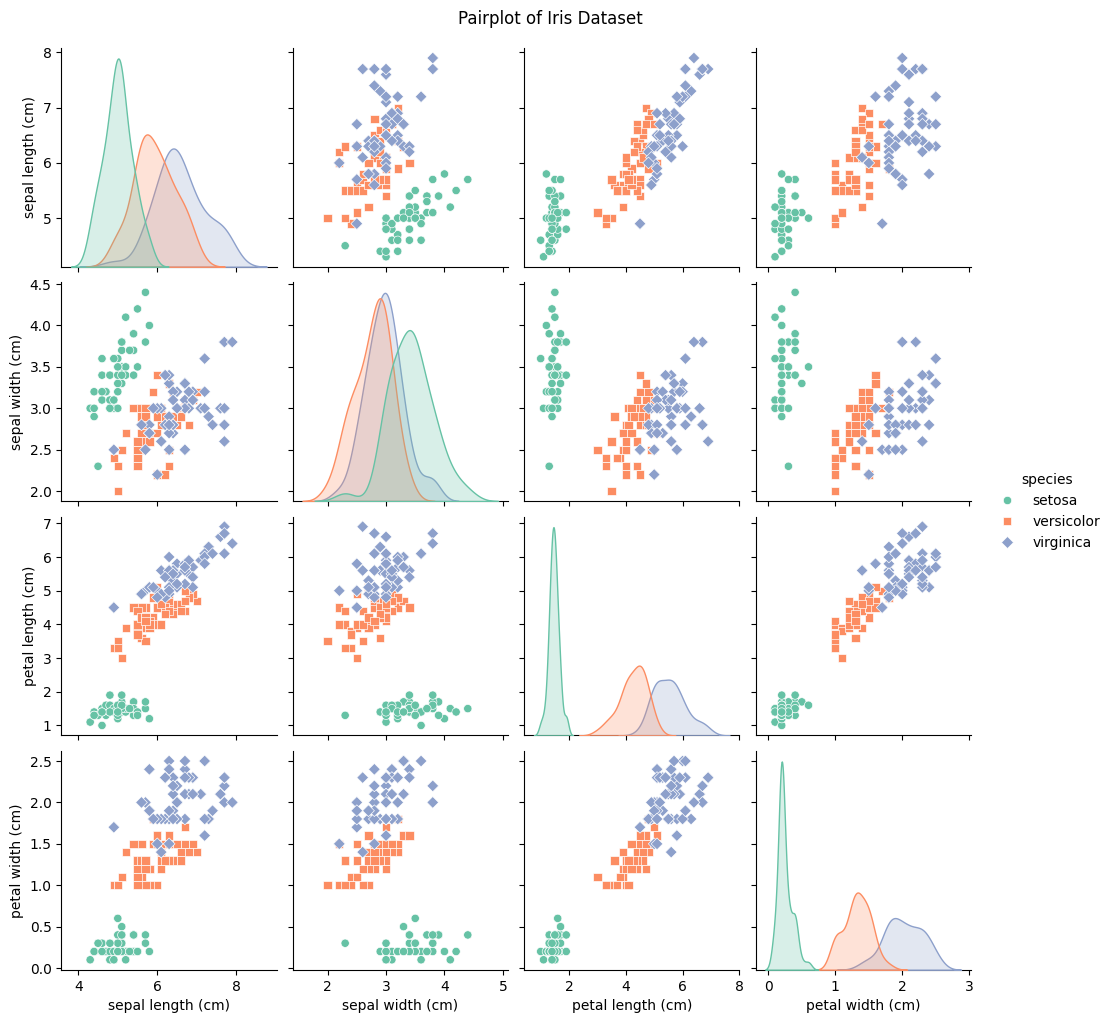

In [6]:
# 1. Pairplot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette="Set2")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

<ipython-input-7-3ca24220870e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, palette="Set2")
<ipython-input-7-3ca24220870e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, palette="Set2")
<ipython-input-7-3ca24220870e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, palette="Set2")
<ipython-input-7-3ca24220870e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

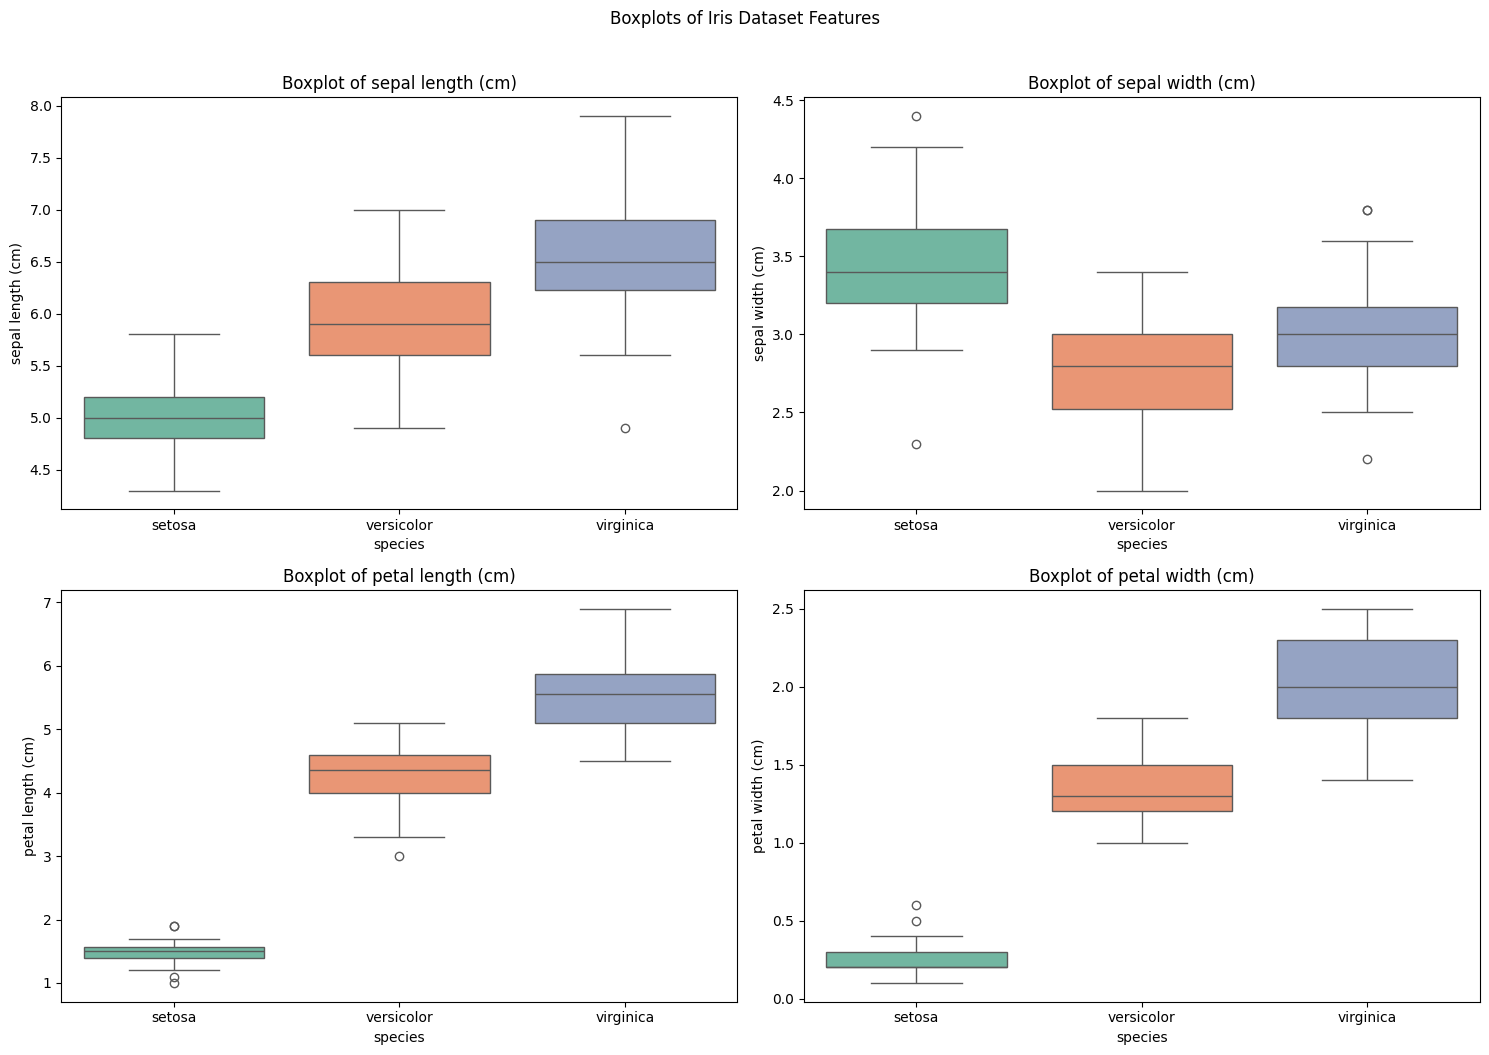

In [7]:
# 2. Boxplots
plt.figure(figsize=(15, 10))

# Subplot for each feature
for i, feature in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=iris_df, palette="Set2")
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.suptitle("Boxplots of Iris Dataset Features", y=1.05)
plt.show()

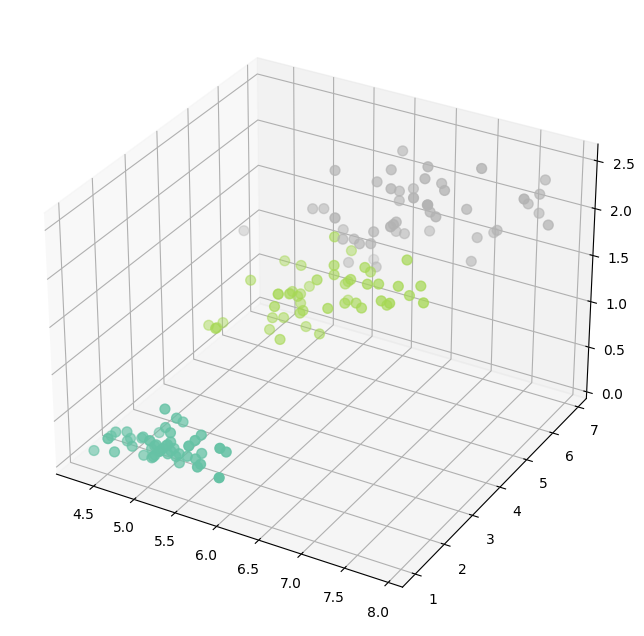

In [8]:
# 3. 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    iris_df['sepal length (cm)'],
    iris_df['petal length (cm)'],
    iris_df['petal width (cm)'],
    c=pd.Categorical(iris_df['species']).codes,
    cmap='Set2',
    s=50
)

Text(0.5, 1.0, '3D Scatter Plot of Iris Dataset')

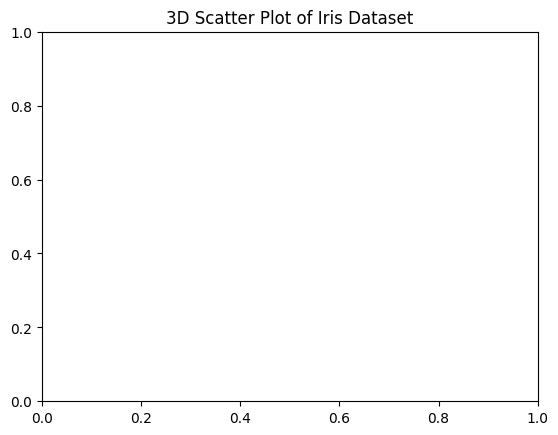

In [9]:
# Adding labels
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
plt.title("3D Scatter Plot of Iris Dataset")

In [10]:
# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend1)

plt.show()

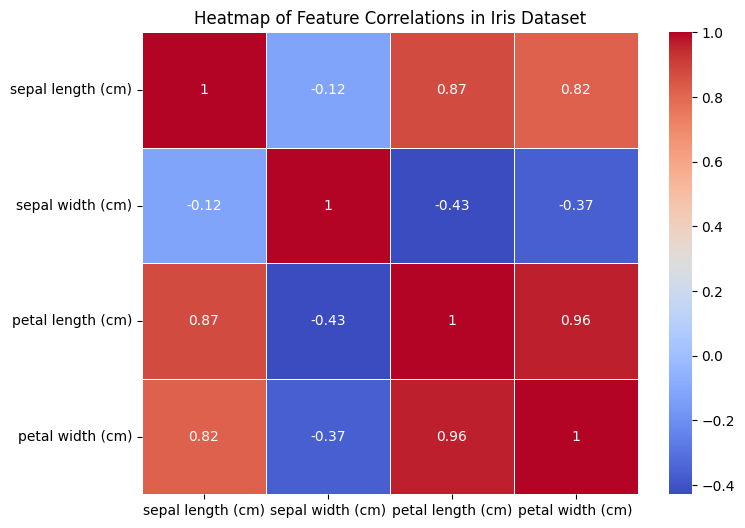

In [11]:
# 4. Heatmap
plt.figure(figsize=(8, 6))
corr = iris_df.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Feature Correlations in Iris Dataset")
plt.show()